<a href="https://colab.research.google.com/github/andrevital001/PUC/blob/main/MVP_Andr%C3%A9_Vital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** André Vital de Medeiros

**Matrícula:** 4052025000626

**Dataset:** [Dados de produção do anuário estatístico da ANP (Agência Nacional do Petróleo, Gás Natural e Biocombustíveis)](https://www.gov.br/anp/pt-br/centrais-de-conteudo/publicacoes/anuario-estatistico/anuario-estatistico-2023)

* Tabela 2.9 - Produção de petróleo, por localização (terra e mar, pré-sal e pós-sal), segundo unidades da Federação - 2014-2023

* Tabela 2.10 - Produçao de LGN, segundo unidades da Federaçao - 2014-2023

* Tabela 2.13 - Produção de gás natural, por localização (terra e mar, pré-sal e pós-sal), segundo unidades da Federação - 2014-2023

* Tabela 4.1 - Producao de etanol anidro e hidratado, segundo grandes regioes e unidades da Federaçao - 2014-2023

* Tabela 4.10 - Produção de biodiesel (B100), segundo grandes regiões e unidades da Federação - 2014-2023

* Tabela 4.17 - Producao de biometano, segundo grandes regiões e unidades da Federacao - 2020-2023

# Descrição do Problema

Em cada uma das tabelas é apresentada uma coluna contendo:
- Região;
- Unidade da Federação;
- Produto;
- Unidade;
- Coluna com os anos de referência.

Com intuito de se realizar uma análise comparativa por produto, por ano, por região e unidade federativa, compreende-se que será necessária a consolidação e tratamento dos dados apresentados.

## Hipóteses do Problema

A partir de uma primeira observação do dataset, as hipóteses são:

- As Unidades da Federação que concentram a maior produção em termos de volume, também possuem a maior diversidade de produtos?
- Há Produtos que tem sido substituídos no decorrer do tempo por outros em ascensão?
- Há tendência de crescimento do volume produzido em todos os produtos analisados?

## Tipo de Problema

Este é um problema de **regressão supervisionada**. Dado que o objetivo é obter, através das bases de dados apresentadas, um alvo numérico contínuo, não uma categoria de produto em si.

## Atributos do Dataset

O dataset Iris contém 150 amostras, com 50 amostras de cada uma das três espécies de Íris. Possui cinco atributos:

- ***Região*** (Norte, Nordeste, Centro-Oeste, Sul e Sudeste);
- ***Unidade*** Federativa (Todos os estados do Brasil, com exceção de Roraima e Amapá);
- ***Produto*** (Biodiesel, Biometado, Etanol, LGN, Gás Natural e Petróleo);
- ***Unidade*** ('m³', 'mil m³', 'milhões de m³' ou 'mil barris');
- ***Ano*** (2014 a 2023);

### Importação das Bibliotecas Necessárias e Carga de Dados

A seção abaixo tem por objetivo importar os pacotes necessários para a leitura e tratamento adequado dos dados.

In [44]:
!pip install unidecode

In [45]:
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from unidecode import unidecode

### Leitura dos dados

A seguir, será lida e carregada a base de dados contida no repositório público do Github: https://github.com/andrevital001/PUC/

In [49]:
# Carregamento de todas as tabelas do repositório github
urls = [
    'https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela2.9.csv',
    'https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela2.10.csv',
    'https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela2.13.csv',
    'https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela4.1.csv',
    'https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela4.10.csv',
    'https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela4.17.csv'
]

df_list = []

for url in urls:
    try:
        print(f"Lendo: {url}")

        df = pd.read_csv(
            url,
            sep=";",
            encoding="utf-8",
            engine="python",
            quotechar='"',
            on_bad_lines="skip"
        )


        # Adiciona o dataframe à lista
        df_list.append(df)

    except Exception as e:
        print(f"❌ Erro ao processar {url}:\n{e}\n")

# Concatenar todas as tabelas lidas e tratadas
data_anp = pd.concat(df_list, ignore_index=True)

# Visualizar as primeiras linhas
data_anp.head()

Lendo: https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela2.9.csv
Lendo: https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela2.10.csv
Lendo: https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela2.13.csv
Lendo: https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela4.1.csv
Lendo: https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela4.10.csv
Lendo: https://raw.githubusercontent.com/andrevital001/PUC/refs/heads/main/Tabela4.17.csv


,Regiao,Unidades da Federacao,Unidade,Produto,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,Amazonas,(mil barris),Petroleo,10.222,9.601,8.561,7.482,7.462,6.814,5.777,5.328,4.900,4.504
1,NaN,Amazonas,(mil barris),Petroleo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Maranhao,(mil barris),Petroleo,43.0,4.0,14.0,13.0,15.0,20,24.0,30,14,27
3,NaN,Maranhao,(mil barris),Petroleo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Ceara,(mil barris),Petroleo,446.0,533.0,567.0,448.0,384.0,316,282.0,247,223,265


### Tratamento de dados nulos

Considerando a criação do dataset a partir da concatenação de dados de diferentes fontes, observa-se a grande quantidade de valores nulos em algumas delas.

Deste modo, entende-se que é possível desconsiderar a coluna 'Região', pois ela contém valores válidos na menor parte dos ocorrência, além da coluna 'Unidades da Federacao' ser suficiente para uma análise relacionada ao local de produção.

In [50]:
# Inserir contador dos valores nulos de cada coluna do dataset
data_anp.isnull().sum()

,0
Regiao,73
Unidades da Federacao,9
Unidade,10
Produto,10
2014,34
2015,34
2016,34
2017,34
2018,34
2019,34


<Axes: >

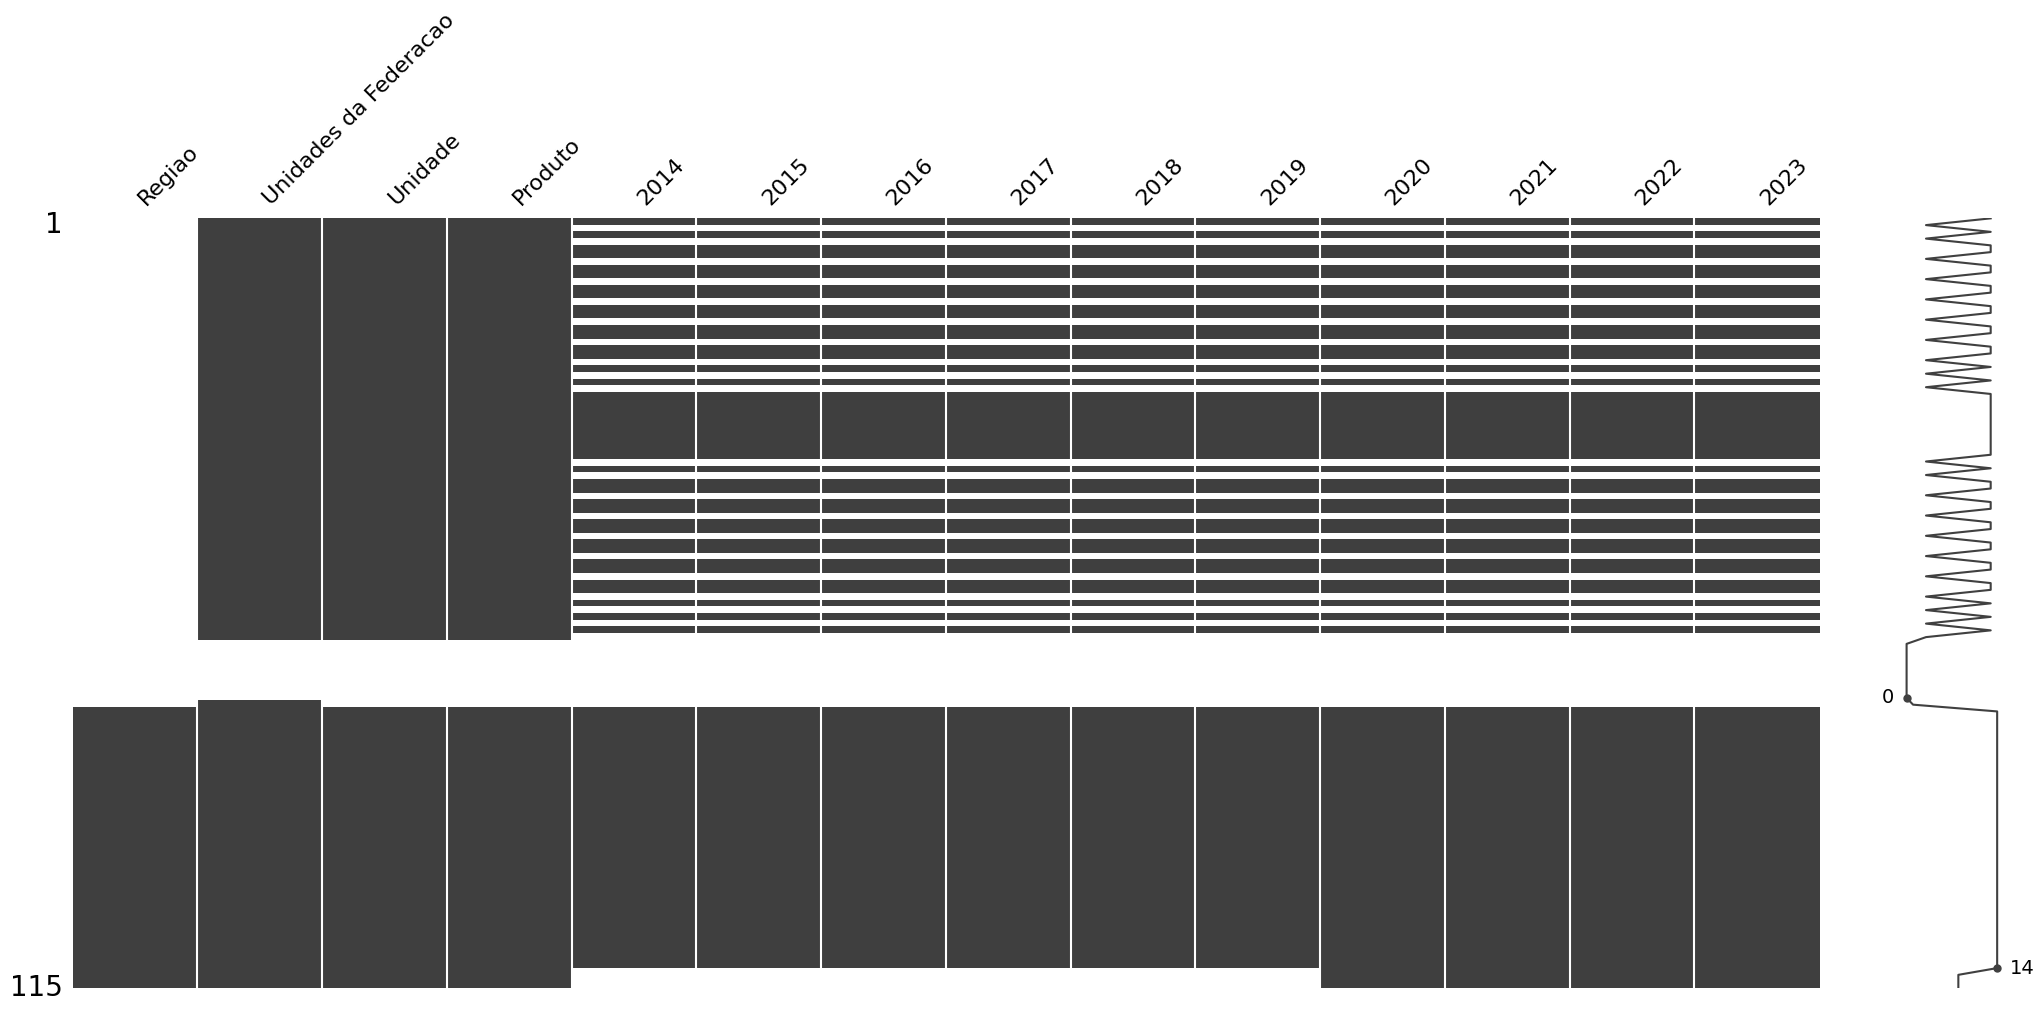

In [51]:
# Representação gráfica dos valores nulos
ms.matrix(data_anp)

In [52]:
# Copiar dataset original
dataset = data_anp.copy()

# Remover coluna 'Região' do dataset analisado

dataset.drop(['Regiao'], axis=1, inplace=True)

dataset.dropna(how='all', inplace=True)

Nota-se que ainda há linhas sem valor de produção em todos os anos, assim como há linhas que contém apenas a unidade de Federação.

In [53]:
# Remover linhas onde há apenas informação de 'Unidades da Federacao'
valor_em_uf = dataset['Unidades da Federacao'].notna()
demais_null = dataset.drop(columns=['Unidades da Federacao']).isna().all(axis=1)
linhas_a_remover = valor_em_uf & demais_null
dataset = dataset[~linhas_a_remover]

# Remover linhas sem valor de produção nos anos de referência
colunas_ano = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
dataset = dataset.dropna(subset=colunas_ano, how='all')

A demais linhas vazias serão consideradas como 0, pois, como não há registro na base de dados da ANP, entende-se que não houve produção.

<Axes: >

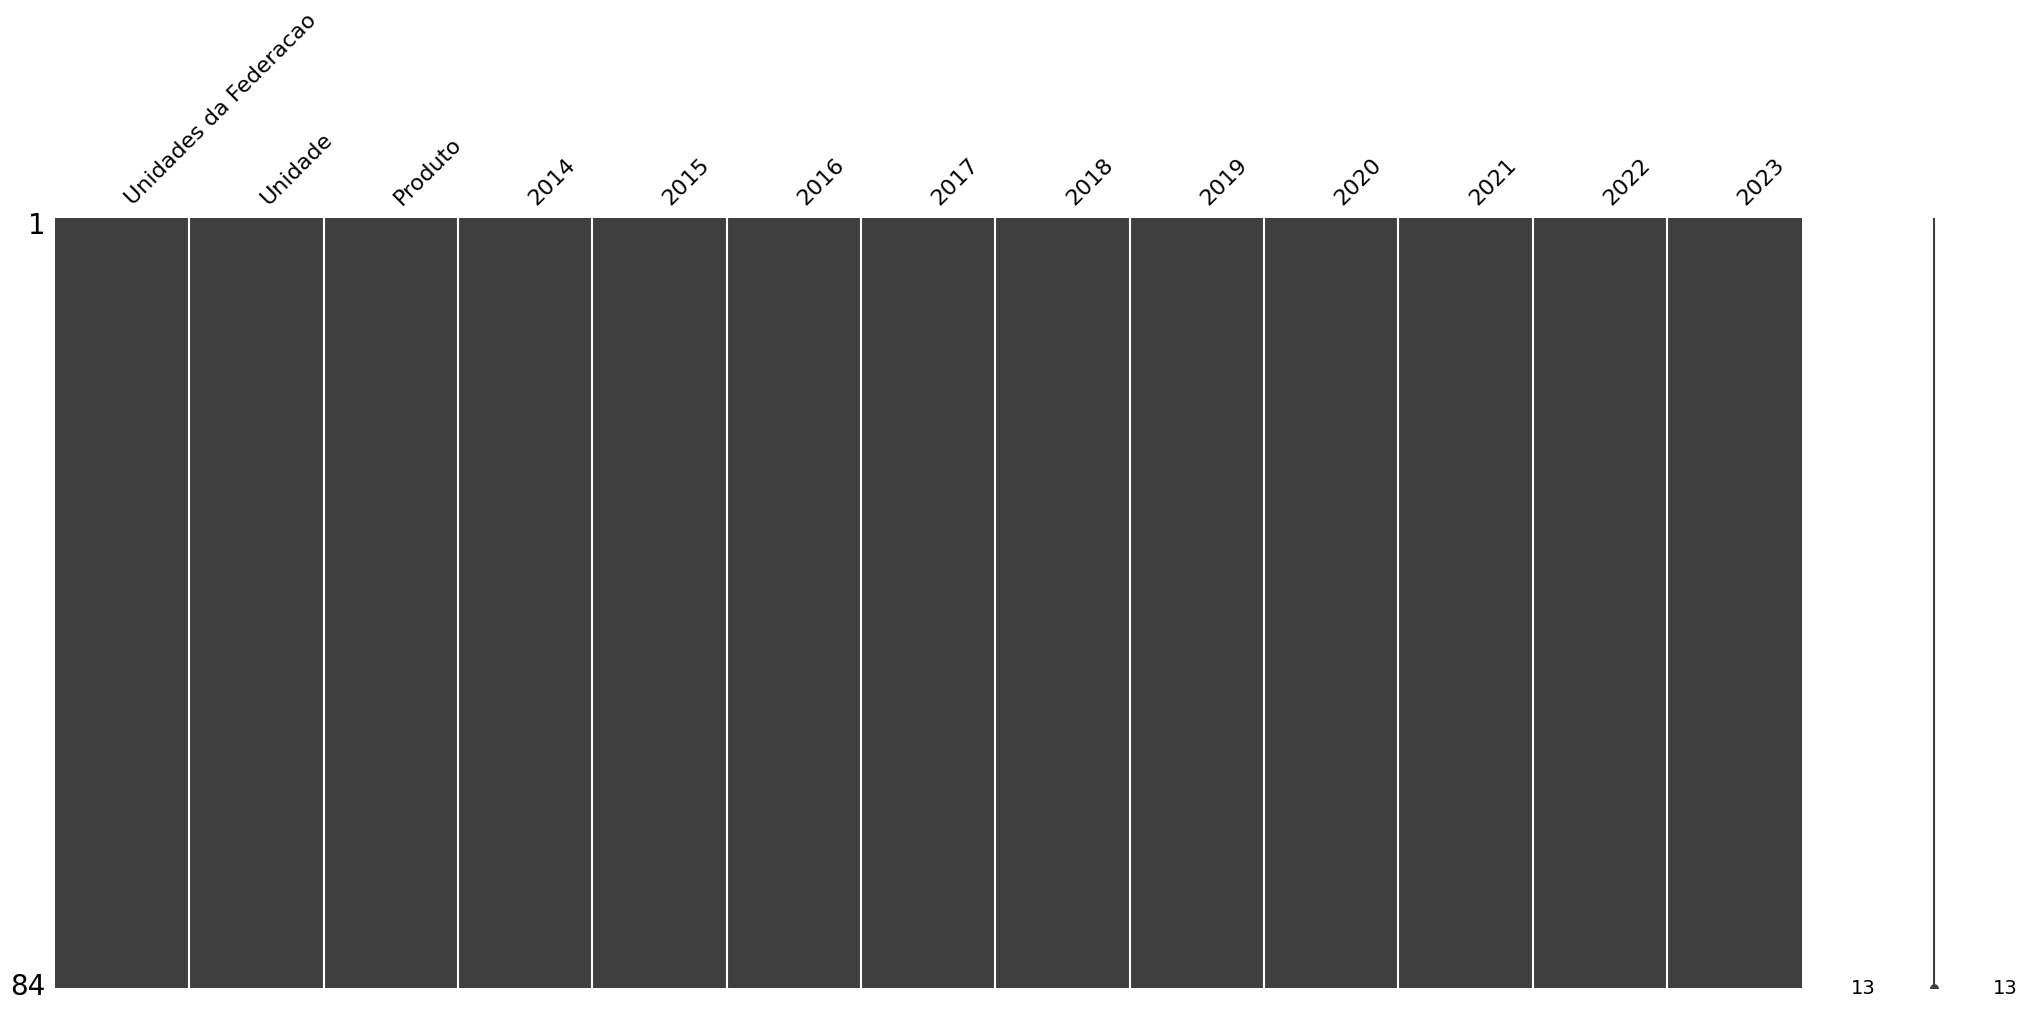

In [54]:
# Substituir valores nulos por 0
dataset.fillna(0, inplace=True)

ms.matrix(dataset)

In [55]:
dataset.isnull().sum()

,0
Unidades da Federacao,0
Unidade,0
Produto,0
2014,0
2015,0
2016,0
2017,0
2018,0
2019,0
2020,0


Ainda há valores não numéricos, como '-'. Estes valores serão substituidos por 0.

In [56]:
dataset.head()

,Unidades da Federacao,Unidade,Produto,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Amazonas,(mil barris),Petroleo,10.222,9.601,8.561,7.482,7.462,6.814,5.777,5.328,4.900,4.504
2,Maranhao,(mil barris),Petroleo,43.0,4.0,14.0,13.0,15.0,20,24.0,30,14,27
4,Ceara,(mil barris),Petroleo,446.0,533.0,567.0,448.0,384.0,316,282.0,247,223,265
5,Ceara,(mil barris),Petroleo,2.221,1.901,1.928,1.558,1.584,1.539,306.0,-,-,-
7,Rio Grande do Norte,(mil barris),Petroleo,18.347,18.247,18.176,15.205,12.83,12.199,11.723,11.887,11.905,11.753


In [58]:
# Substituir '-' por 0

dataset.replace(" - ", np.nan, inplace=True)
dataset.fillna(0, inplace=True)

# Transformar todos os valores em 'float'

colunas_ano = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

for col in colunas_ano:

    valores = dataset[col].astype(str)

    # Remover os pontos usados como separadores de milhar
    valores_sem_milhar = valores.str.replace(".", "", regex=False)

    # Trocar vírgulas por pontos para corrigir separadores decimais
    valores_final = valores_sem_milhar.str.replace(",", ".", regex=False)

    # Atualizar a coluna no dataset
    dataset[col] = valores_final


In [59]:
dataset.head()

,Unidades da Federacao,Unidade,Produto,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Amazonas,(mil barris),Petroleo,10222,9601,8561,7482,7462,6814,5777,5328,4900,4504
2,Maranhao,(mil barris),Petroleo,430,40,140,130,150,20,240,30,14,27
4,Ceara,(mil barris),Petroleo,4460,5330,5670,4480,3840,316,2820,247,223,265
5,Ceara,(mil barris),Petroleo,2221,1901,1928,1558,1584,1539,3060,0,0,0
7,Rio Grande do Norte,(mil barris),Petroleo,18347,18247,18176,15205,1283,12199,11723,11887,11905,11753


Há colunas repetidas de 'Unidades da Federacao' e 'Produto'. O valor de ambas pode ser somado, pois entende-se que trata de diferentes produções no mesmo UF.

In [60]:
# Transformar todos os valores em float
for col in colunas_ano:
    valores = dataset[col].astype(str)
    valores_float = valores.astype(float)
    dataset[col] = valores_float.round(2)

# agrupar, somar e manter duas casas decimais nos valores
dataset_agrupado = (
    dataset
    .groupby(['Unidades da Federacao','Unidade', 'Produto'])[colunas_ano]
    .sum().round(2)
    .reset_index()
)

dataset_agrupado

,Unidades da Federacao,Unidade,Produto,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Acre,(mil m3),Etanol anidro e hidratado,0.0,451.0,367.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alagoas,(mil barris),LGN,5160.0,4480.0,598.0,502.0,514.0,369.0,389.0,296.0,28.0,547.0
2,Alagoas,(mil barris),Petroleo,2669.0,2526.0,2049.0,1639.0,9720.0,9280.0,9300.0,674.0,882.0,908.0
3,Alagoas,(mil m3),Etanol anidro e hidratado,48525.0,55456.0,36649.0,31188.0,4641.0,50316.0,42589.0,42361.0,38491.0,51168.0
4,Alagoas,(milhoes de m3),Gas Natural,5353.0,3653.0,4183.0,3917.0,961.0,3145.0,3095.0,650.0,2740.0,4366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Sergipe,(mil barris),Petroleo,14972.0,12163.0,10902.0,8471.0,6629.0,5375.0,10916.0,2903.0,1364.0,2451.0
68,Sergipe,(mil m3),Etanol anidro e hidratado,11154.0,16989.0,7603.0,6374.0,1042.0,10183.0,9716.0,113.0,7911.0,9089.0
69,Sergipe,(milhoes de m3),Gas Natural,10580.0,8638.0,9492.0,7668.0,7913.0,1009.0,1734.0,182.0,82.0,191.0
70,Tocantins,(m3),Biodiesel,73604.0,62085.0,37923.0,561.0,85101.0,92489.0,141757.0,140698.0,94669.0,89052.0


### Transposição das linhas com o Anos para colunas
Para melhor estruturação do dataset, as colunas que continham o ano como cabeçalho foram transpostas, criando assim a coluna 'Ano'.

In [61]:
# Realizar a transposição das colunas de ano.

colunas_ano = [str(ano) for ano in range(2014, 2024)]

# Realizar a transposição
dataset_transposto = pd.melt(
    dataset_agrupado,
    id_vars=['Unidades da Federacao', 'Unidade', 'Produto'],
    value_vars=colunas_ano,
    var_name='Ano',
    value_name='Producao'
)

dataset_transposto

,Unidades da Federacao,Unidade,Produto,Ano,Producao
0,Acre,(mil m3),Etanol anidro e hidratado,2014,0.0
1,Alagoas,(mil barris),LGN,2014,5160.0
2,Alagoas,(mil barris),Petroleo,2014,2669.0
3,Alagoas,(mil m3),Etanol anidro e hidratado,2014,48525.0
4,Alagoas,(milhoes de m3),Gas Natural,2014,5353.0
...,...,...,...,...,...
715,Sergipe,(mil barris),Petroleo,2023,2451.0
716,Sergipe,(mil m3),Etanol anidro e hidratado,2023,9089.0
717,Sergipe,(milhoes de m3),Gas Natural,2023,191.0
718,Tocantins,(m3),Biodiesel,2023,89052.0


### Normalização e padronização dos dados

A fim de se realizar uma análise mais assertiva dos dados, submeteremos o dataframe criado ao processo de padronização e normalização.

In [62]:
# Normalizar dados transpostos

# Cria uma cópia dos dados para manter os valores originais intactos
dataset_normalizado = dataset_transposto.copy()

# Inicializa o MinMaxScaler
scaler = MinMaxScaler()

# Definir coluna com Produção

Producao = ['Producao']

# Aplica o MinMaxScaler somente nas colunas de ano
dataset_normalizado[Producao] = scaler.fit_transform(dataset_normalizado[Producao])

print("Dados originais: \n\n", dataset_transposto[Producao].values)
print("\nDados normalizados: \n\n", dataset_normalizado[Producao].values)

Dados originais: 

 [[0.0000000e+00]
 [5.1600000e+03]
 [2.6690000e+03]
 [4.8525000e+04]
 [5.3530000e+03]
 [6.0850000e+03]
 [1.0222000e+04]
 [2.9200000e+02]
 [4.7038000e+05]
 [1.6019200e+05]
 [1.4840000e+03]
 [1.9192000e+04]
 [2.4029000e+04]
 [2.2560100e+05]
 [7.2984000e+04]
 [0.0000000e+00]
 [5.7000000e+02]
 [6.6810000e+03]
 [9.1300000e+02]
 [3.2800000e+02]
 [6.1400000e+02]
 [1.3397400e+05]
 [1.6235000e+04]
 [4.6829900e+05]
 [6.4383700e+05]
 [4.2690300e+05]
 [4.3000000e+02]
 [1.7915000e+04]
 [1.9684000e+05]
 [6.1110800e+05]
 [1.1320400e+05]
 [2.1729700e+05]
 [2.3497400e+05]
 [8.3283000e+04]
 [2.6762800e+05]
 [0.0000000e+00]
 [4.2150000e+03]
 [3.7570000e+03]
 [3.1922200e+05]
 [1.5794600e+05]
 [0.0000000e+00]
 [3.3606000e+04]
 [0.0000000e+00]
 [3.2510000e+03]
 [0.0000000e+00]
 [1.3380000e+03]
 [2.0962000e+04]
 [7.3240000e+03]
 [4.8990000e+03]
 [9.7364700e+05]
 [4.4000000e+01]
 [1.7262000e+04]
 [0.0000000e+00]
 [1.5177000e+04]
 [5.6323200e+05]
 [8.8490000e+03]
 [1.1097400e+06]
 [1.0977000

In [63]:
# Padronizar dados transpostos

# Cria uma cópia dos dados para manter os valores originais intactos
dataset_padronizado = dataset_transposto.copy()

# Inicializa o StandardScaler
scaler = StandardScaler()

# Definir coluna com Produção
Producao = ['Producao']

# Aplica o StandardScaler somente nas colunas de ano
dataset_padronizado[Producao] = scaler.fit_transform(dataset_padronizado[Producao])

print("Dados originais: \n\n", dataset_transposto[Producao].values)
print("\nDados padronizados: \n\n", dataset_padronizado[Producao].values)

Dados originais: 

 [[0.0000000e+00]
 [5.1600000e+03]
 [2.6690000e+03]
 [4.8525000e+04]
 [5.3530000e+03]
 [6.0850000e+03]
 [1.0222000e+04]
 [2.9200000e+02]
 [4.7038000e+05]
 [1.6019200e+05]
 [1.4840000e+03]
 [1.9192000e+04]
 [2.4029000e+04]
 [2.2560100e+05]
 [7.2984000e+04]
 [0.0000000e+00]
 [5.7000000e+02]
 [6.6810000e+03]
 [9.1300000e+02]
 [3.2800000e+02]
 [6.1400000e+02]
 [1.3397400e+05]
 [1.6235000e+04]
 [4.6829900e+05]
 [6.4383700e+05]
 [4.2690300e+05]
 [4.3000000e+02]
 [1.7915000e+04]
 [1.9684000e+05]
 [6.1110800e+05]
 [1.1320400e+05]
 [2.1729700e+05]
 [2.3497400e+05]
 [8.3283000e+04]
 [2.6762800e+05]
 [0.0000000e+00]
 [4.2150000e+03]
 [3.7570000e+03]
 [3.1922200e+05]
 [1.5794600e+05]
 [0.0000000e+00]
 [3.3606000e+04]
 [0.0000000e+00]
 [3.2510000e+03]
 [0.0000000e+00]
 [1.3380000e+03]
 [2.0962000e+04]
 [7.3240000e+03]
 [4.8990000e+03]
 [9.7364700e+05]
 [4.4000000e+01]
 [1.7262000e+04]
 [0.0000000e+00]
 [1.5177000e+04]
 [5.6323200e+05]
 [8.8490000e+03]
 [1.1097400e+06]
 [1.0977000

### Aplicação do One-Hot Encode para as variáveis categóricas

Será aplicada técnica One-Hot Encode nas variáveis 'Produto' e 'Unidades da Ferederacao'.

In [64]:
# Copiar dataset original
df = dataset_transposto.copy()

# Selecionar apenas as colunas categóricas desejadas
X_categorico = df[['Produto', 'Unidades da Federacao']]

# One-Hot Enconde para atributos categóricos
X_encoded = OneHotEncoder(sparse_output=False).fit_transform(X_categorico)

print("Atributos Transformados")
print(X_encoded)

Atributos Transformados
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]


## Criação de gráficos para análise do dataset

A seguir serão desenvolvidos alguns visuais a fim de se ter um comparativo da produção, com base nos tipos de produtos, Unidades da Federação e anos de registro.

### 1. Produção por Ano

A seguir será realizada a análise do desempenho produtivo na série temporal, considerando todos os produtos e agrupando o valor produzido nos diferentes estados.

Observação:
Os anos com Produção 0 não constarão nos gráficos plotados

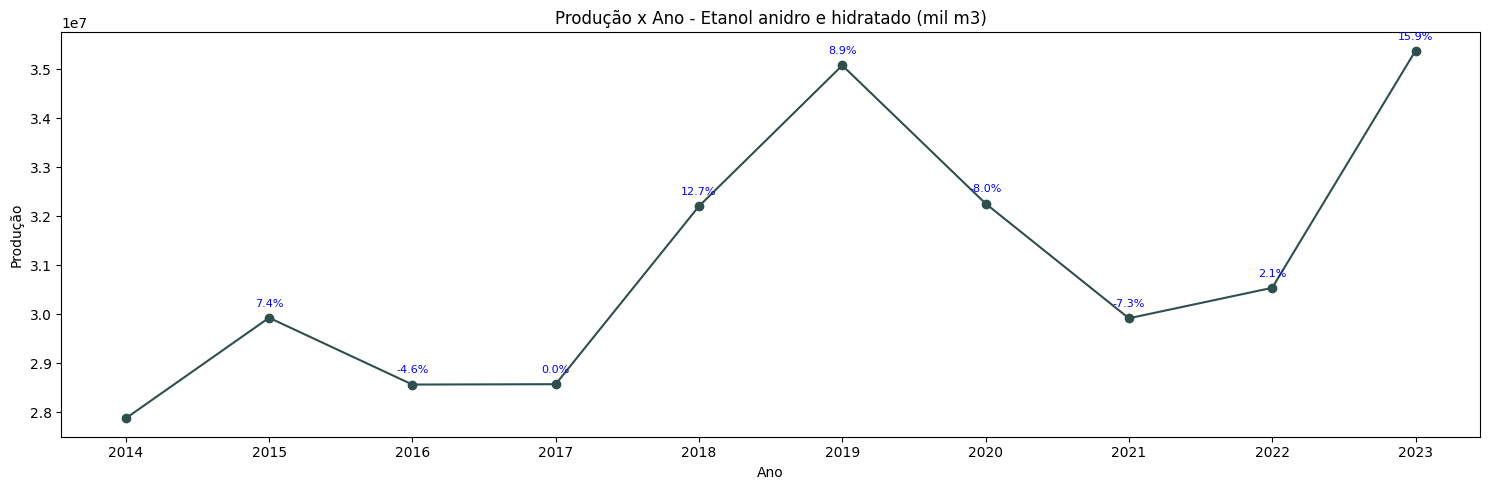

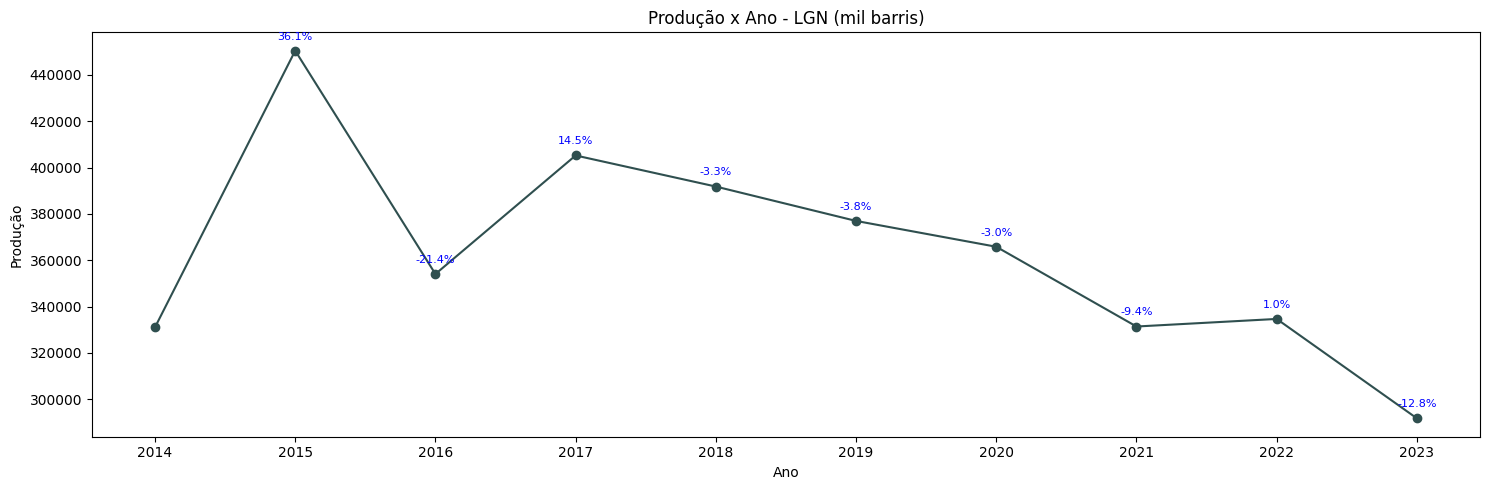

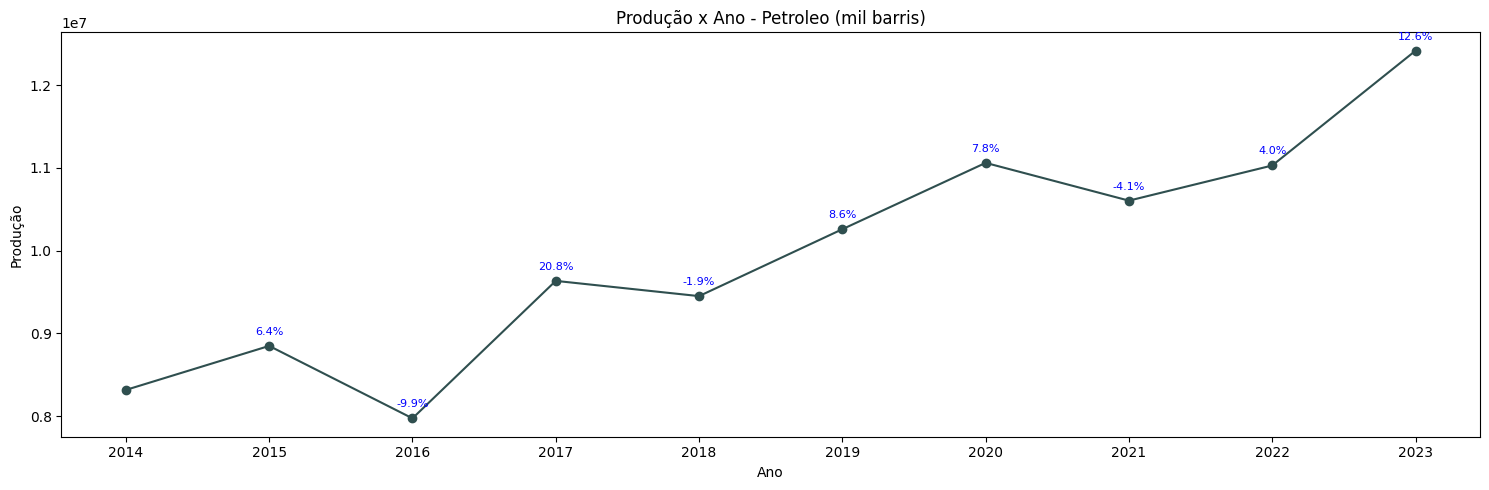

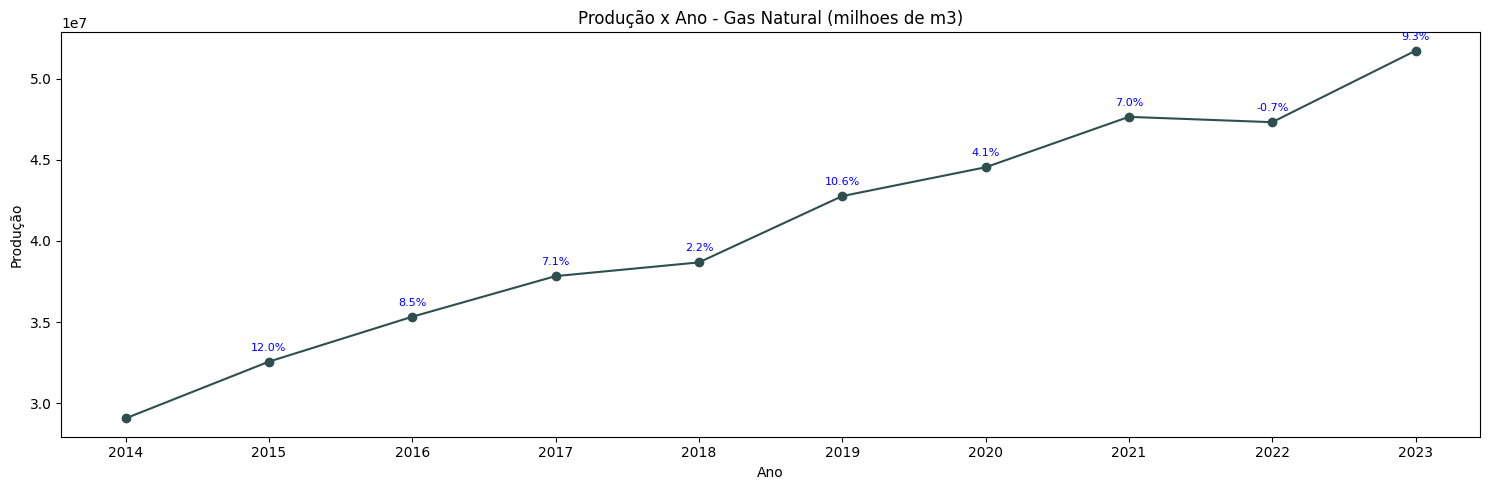

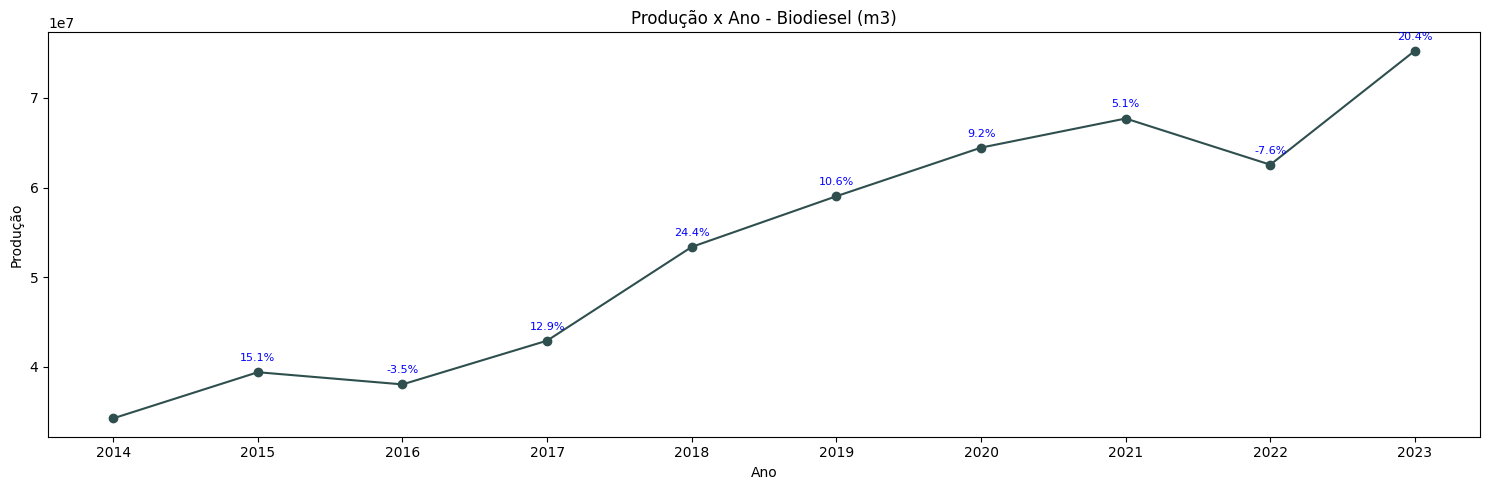

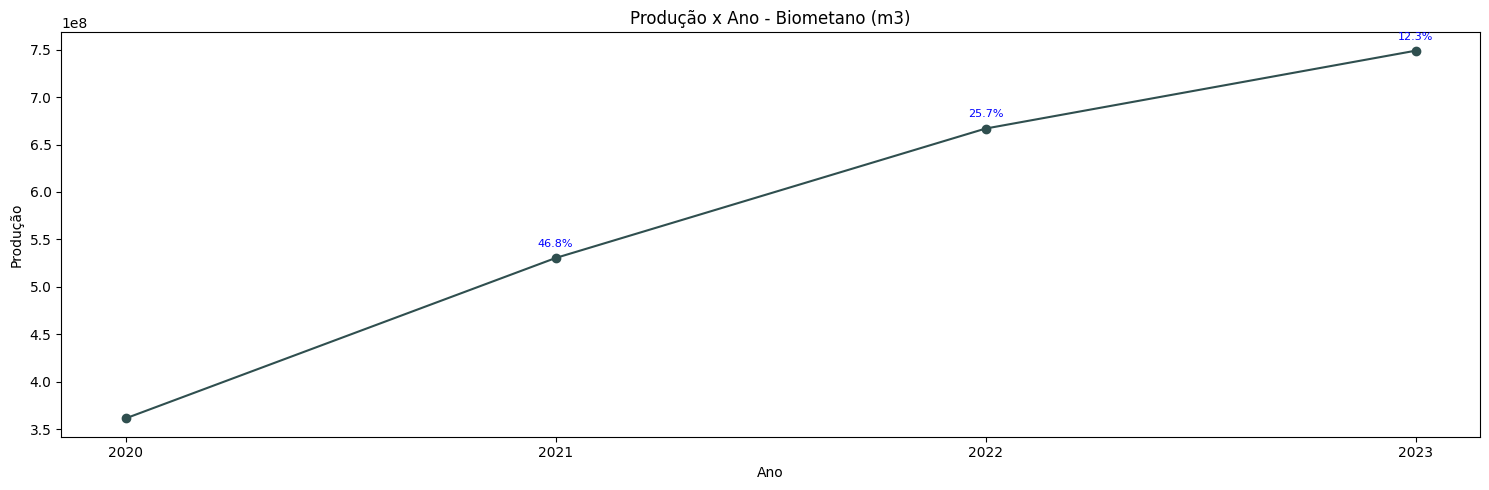

In [68]:
# Converter a coluna de produção para número
df['Producao'] = (
    df['Producao']
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
)
df['Producao'] = pd.to_numeric(df['Producao'], errors='coerce')

# Lista única de produtos na base
produtos = df['Produto'].unique()

# Loop para gerar um gráfico por produto
for produto in produtos:
    # Filtrar dados do produto atual
    df_produto = df[df['Produto'] == produto]

    # Definir unidade associada ao produto
    unidade = df_produto['Unidade'].dropna().unique()
    unidade_str = unidade[0] if len(unidade) > 0 else ""

    # Agrupar por ano e somar a produção
    df_agrupado = df_produto.groupby('Ano', as_index=False)['Producao'].sum()

    # Copiar para plotagem e substituir 0 por NaN
    df_agrupado_plot = df_agrupado.copy()
    df_agrupado_plot['Producao'] = df_agrupado_plot['Producao'].replace(0, np.nan)

    # Calcular crescimento percentual ano a ano
    df_agrupado_plot['Crescimento'] = df_agrupado_plot['Producao'].pct_change() * 100

    # Criar gráfico
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df_agrupado_plot['Ano'], df_agrupado_plot['Producao'], color='#2F4F4F', marker="o")

    # Rótulos de crescimento percentual e marcação de Máx/Mín
    for i, row in df_agrupado_plot.iterrows():
        if pd.notna(row['Crescimento']):
            ax.annotate(f"{row['Crescimento']:.1f}%",
                        xy=(row['Ano'], row['Producao']),
                        xytext=(0, 8),
                        textcoords='offset points',
                        ha='center', fontsize=8, color='blue')

    # Ajustes e títulos
    ax.set_title(f'Produção x Ano - {produto} {unidade_str}')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Produção')
    plt.tight_layout()
    plt.show()

### 1.1. Análise

Oberva-se uma tendência de crescimento em todos os gráficos, **com exceção da produção de LGN**. O qual apresentou a **menor produção** no último ano da série analisada (2023).

A produção de **Biometano** possui menor registro temporal, porém o **crescimento** anual é bastante **expressivo**.



---



### 2. Produção por Unidade da Federação

Nesta etapa será analisado o percentual produzido por estado, para cada um dos produtos.
Serão destacados os estados com maior percentual de produção.

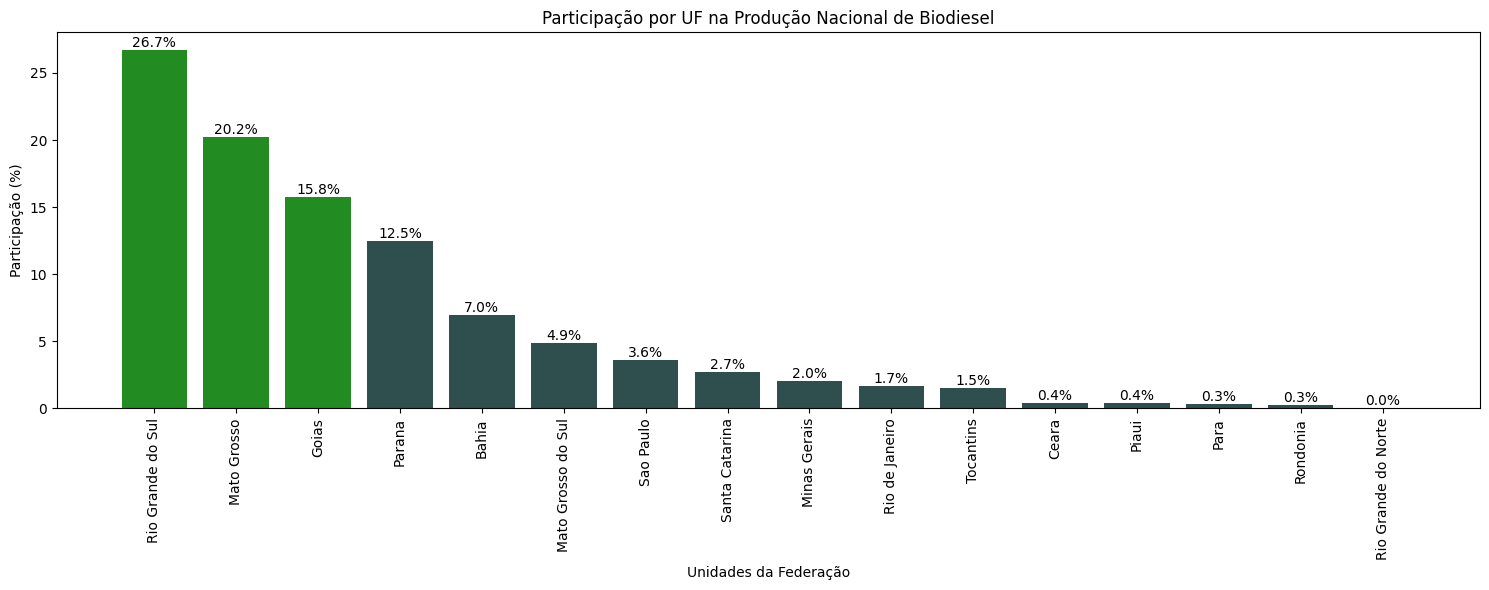

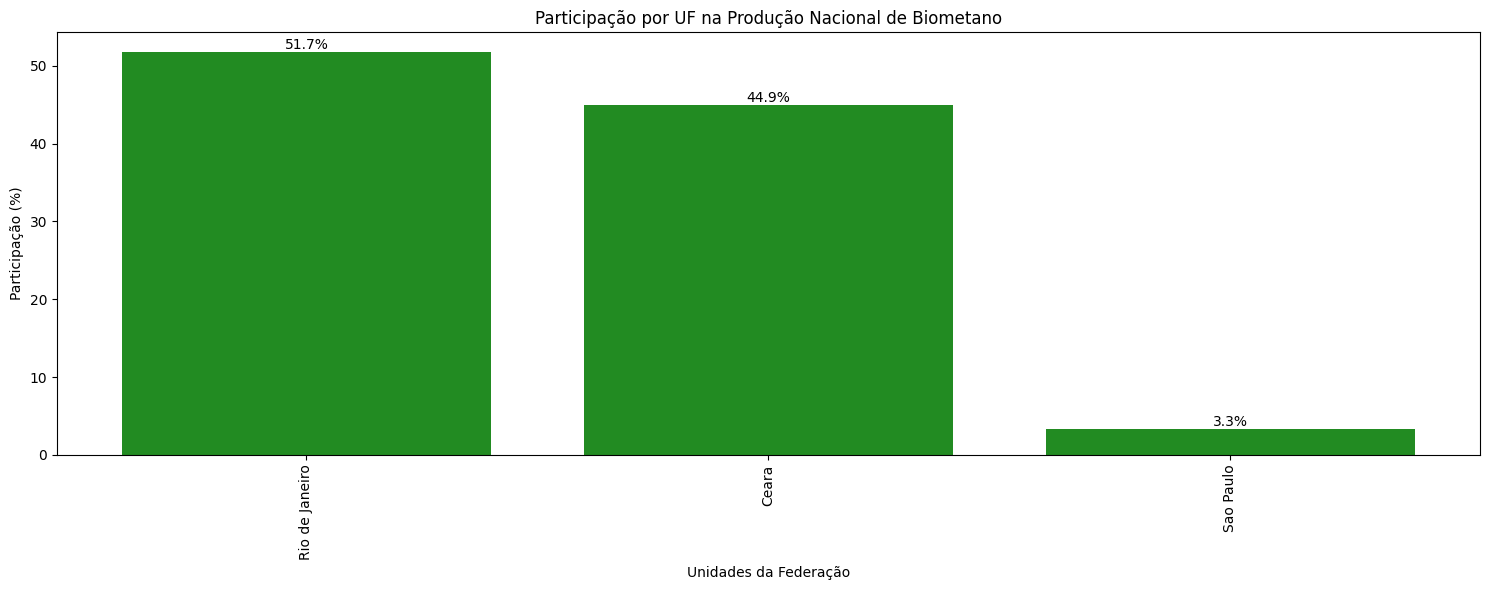

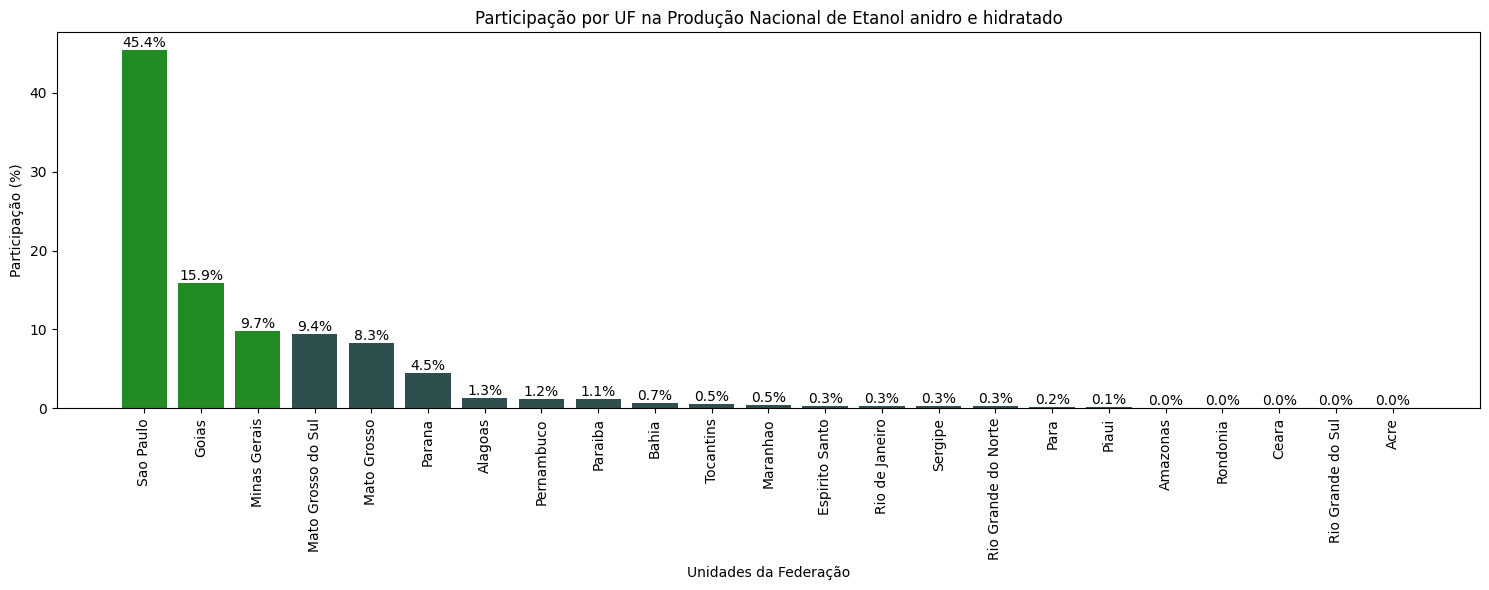

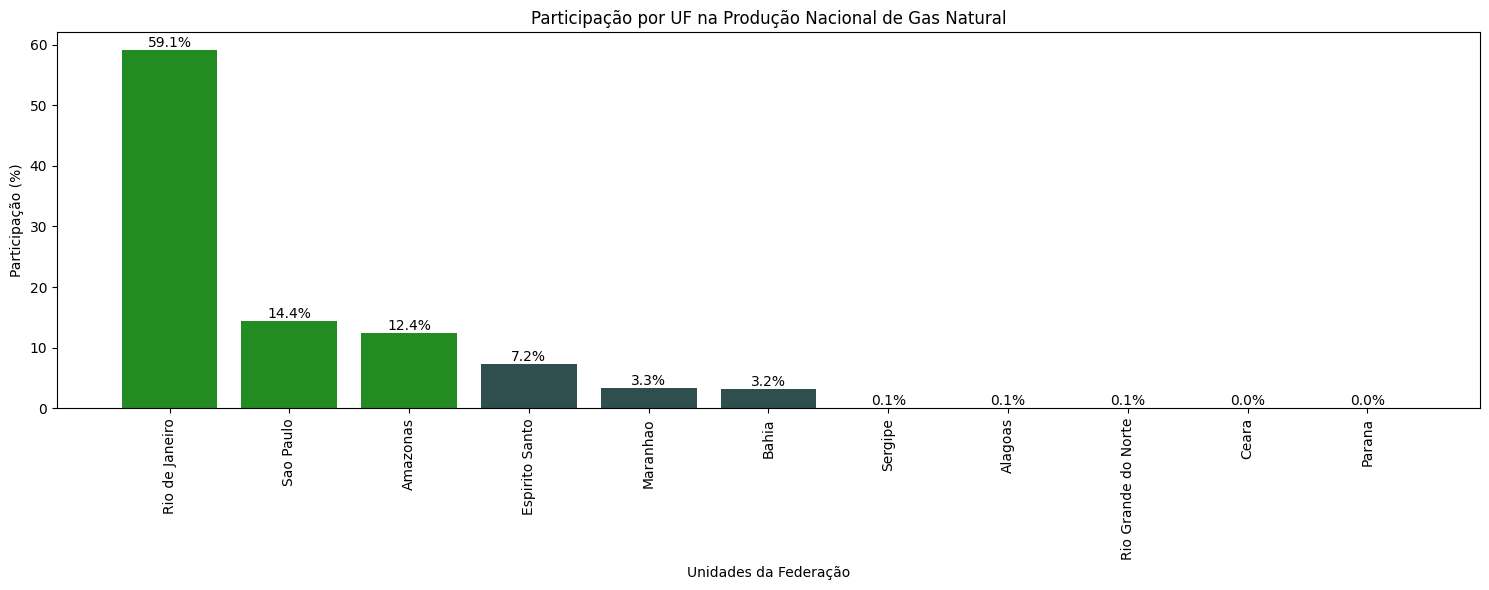

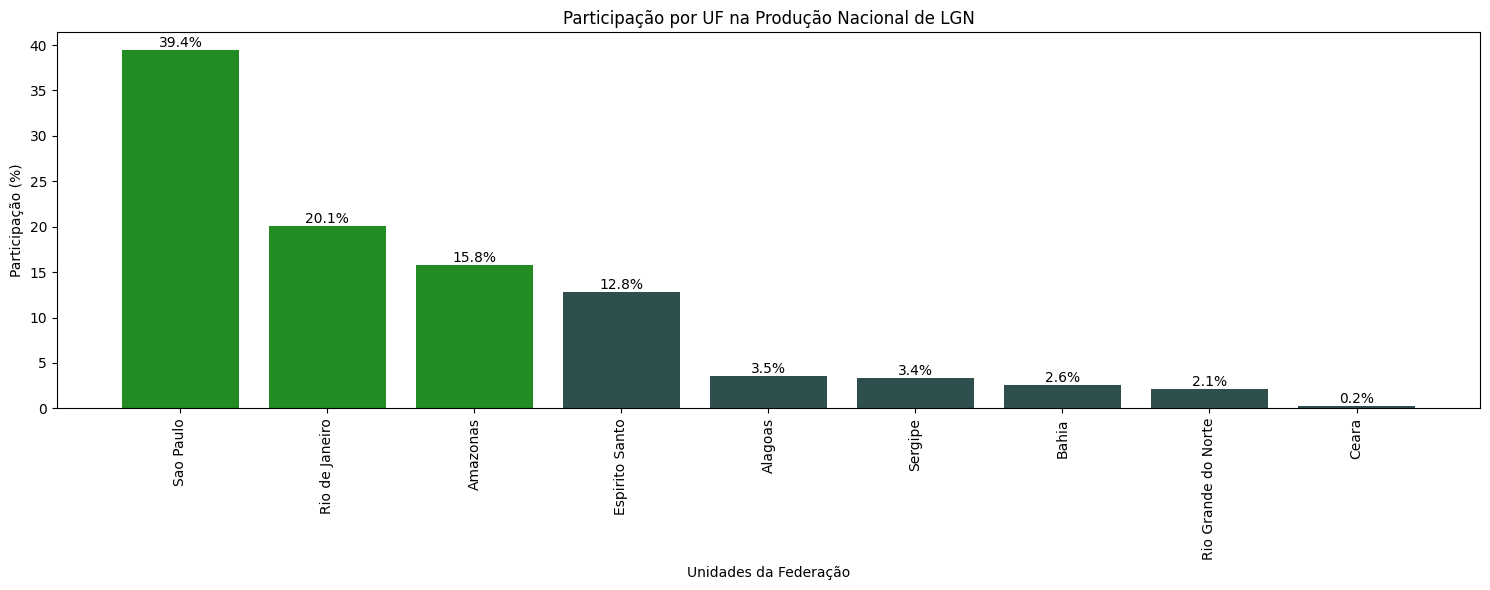

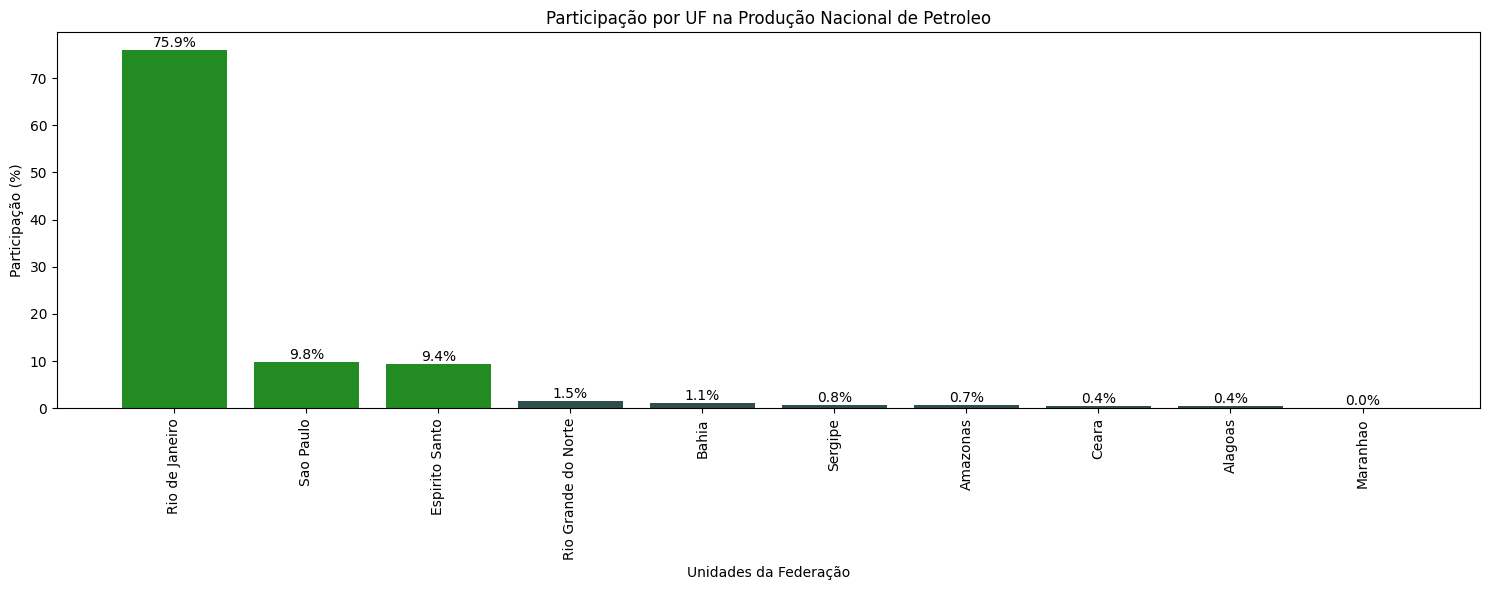

In [70]:
# Agrupar por Produto e UF (somando produções)
df_uf_prod = df.groupby(['Produto', 'Unidades da Federacao'], as_index=False)['Producao'].sum()

# Calcular total nacional por Produto
df_totais = df_uf_prod.groupby('Produto')['Producao'].transform('sum')

# Calcular % da produção por UF em relação ao total do Produto
df_uf_prod['Percentual'] = (df_uf_prod['Producao'] / df_totais) * 100

# Criar gráfico para cada Produto
produtos = df_uf_prod['Produto'].unique()

for produto in produtos:
    df_prod = df_uf_prod[df_uf_prod['Produto'] == produto].copy()

    # Ordenar do maior para o menor percentual
    df_prod = df_prod.sort_values(by='Percentual', ascending=False)

    # Adicionar cor diferenciada para os 3 estados com maior produção
    df_prod['Cor'] = '#2F4F4F'
    df_prod.iloc[:3, df_prod.columns.get_loc('Cor')] = '#228B22'

    # Criar gráfico
    fig, ax = plt.subplots(figsize=(15, 6))
    barras = ax.bar(df_prod['Unidades da Federacao'], df_prod['Percentual'], color=df_prod['Cor'])

    # Rótulo nas barras
    ax.bar_label(barras, fmt='%.1f%%')

    # Títulos e ajustes
    ax.set_title(f'Participação por UF na Produção Nacional de {produto}')
    ax.set_xlabel('Unidades da Federação')
    ax.set_ylabel('Participação (%)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## 2.1. Análise
Nota-se que para maioria dos produtos analisados, destacam-se os estados do **Rio de Janeiro** e **São Paulo** como tendo volume de produção mais elevado em diversos produtos.

O estado de **Goiás** aparece de modo mais relevante na **produção de Etanol e Biodiesel**. O que se deve ao maior acesso à matéria-prima utilizada como base nessas produções em específico.



---



## 3. Diversificação de Produtos por Unidade da Federação

Considerando a diferença da ordem de grandeza de cada um dos produtos, foi criado um índice com intuido de compreender qual Unidade da Federação possui um volume de produção mais significativo.

O índice calculado considera o volume produzido em relação aos demais estados. Sendo assim, a UF com os melhores rankings de produção de um determinado produto terá um índice mais elevado.

In [71]:
# Lista para armazenar pontuações parciais
pontuacoes = []

# Copiar df original para preservar e editar
df_com_indice = df.copy()
df_com_indice['Indice'] = 0  # inicializa a coluna

# Calcular pontuação para cada produto
for produto in df['Produto'].unique():
    df_prod = df[df['Produto'] == produto].copy()
    df_prod = df_prod[df_prod['Producao'] > 0]  # apenas produções maiores que zero

    # Ranking e normalização
    df_prod['Rank'] = df_prod['Producao'].rank(method='min', ascending=False)
    max_rank = df_prod['Rank'].min()
    min_rank = df_prod['Rank'].max()

    if max_rank == min_rank:
        df_prod['Indice'] = 50
    else:
        df_prod['Indice'] = ((min_rank - df_prod['Rank']) / (min_rank - max_rank)) * 50

    pontuacoes.append(df_prod[['Unidades da Federacao', 'Indice']])

# Unir tudo e somar
df_pontuacao = pd.concat(pontuacoes)
df_indice = df_pontuacao.groupby('Unidades da Federacao', as_index=False)['Indice'].sum()
df_indice = df_indice.sort_values(by='Indice', ascending=False)

df_indice

,Unidades da Federacao,Indice
21,Sao Paulo,1994.411209
18,Rio de Janeiro,1758.265249
3,Bahia,1230.030383
5,Espirito Santo,1209.734710
2,Amazonas,988.669109
6,Goias,869.922481
8,Mato Grosso,843.576966
13,Parana,755.160911
16,Rio Grande do Norte,716.246389
9,Mato Grosso do Sul,704.767442


Após a criação do índice de volume produzido, será considerada a quantidade de produtos diferentes produzida por cada Unidade da Federação.

In [72]:
uf_siglas = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amazonas': 'AM', 'Bahia': 'BA', 'Ceara': 'CE',
    'Distrito Federal': 'DF', 'Espirito Santo': 'ES', 'Goias': 'GO', 'Maranhao': 'MA',
    'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Para': 'PA', 'Paraiba': 'PB', 'Parana': 'PR', 'Pernambuco': 'PE', 'Piaui': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondonia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'Sao Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}


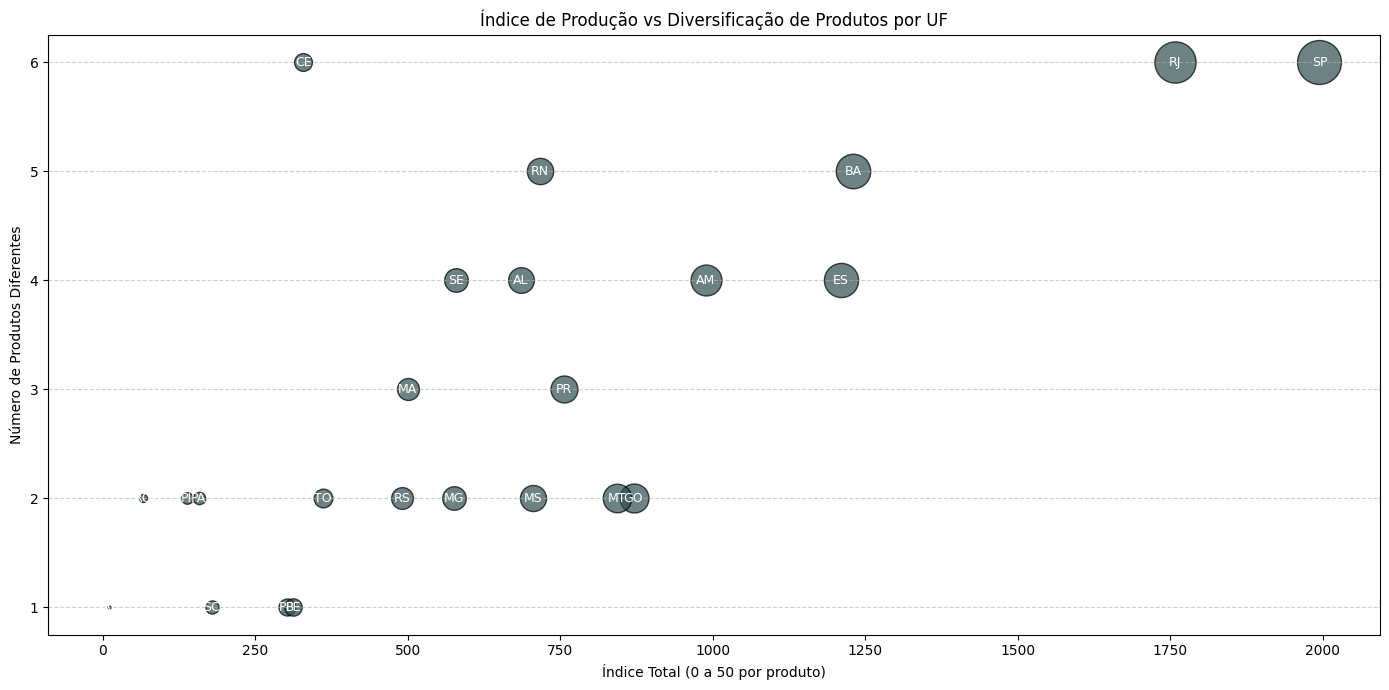

In [73]:
# Agrupar volume total por UF
df_volume_total = df.groupby('Unidades da Federacao', as_index=False)['Producao'].sum()

# Calcular diversidade de produtos por UF
df_diversidade = (
    df.groupby('Unidades da Federacao')['Produto']
    .nunique()
    .reset_index()
    .rename(columns={'Produto': 'Diversidade'})
)

# Mesclar volume e diversidade
df_disp = pd.merge(df_volume_total, df_diversidade, on='Unidades da Federacao')

# Mesclar índice calculado anteriormente
df_disp = pd.merge(df_disp, df_indice, on='Unidades da Federacao', how='left')

# Limpar e converter colunas
df_plot = df_disp.dropna(subset=['Indice', 'Diversidade']).copy()
df_plot['Indice'] = pd.to_numeric(df_plot['Indice'], errors='coerce')
df_plot['Diversidade'] = pd.to_numeric(df_plot['Diversidade'], errors='coerce')

# Visualização
plt.figure(figsize=(14, 7))

# Plotar bolhas com rótulo de siglas
for _, row in df_plot.iterrows():
    plt.scatter(
        row['Indice'],
        row['Diversidade'],
        s=(row['Indice'] / df_plot['Indice'].max()) * 1000,
        color='#2F4F4F',
        alpha=0.7,
        edgecolors='k'
    )

    # Adiciona rótulo com sigla da UF
    sigla = uf_siglas.get(row['Unidades da Federacao'], '')  # precisa de dict `uf_siglas`
    plt.text(
        row['Indice'], row['Diversidade'], sigla,
        fontsize=9, ha='center', va='center', color='white'
    )

# Títulos e ajustes
plt.title('Índice de Produção vs Diversificação de Produtos por UF')
plt.xlabel('Índice Total (0 a 50 por produto)')
plt.ylabel('Número de Produtos Diferentes')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


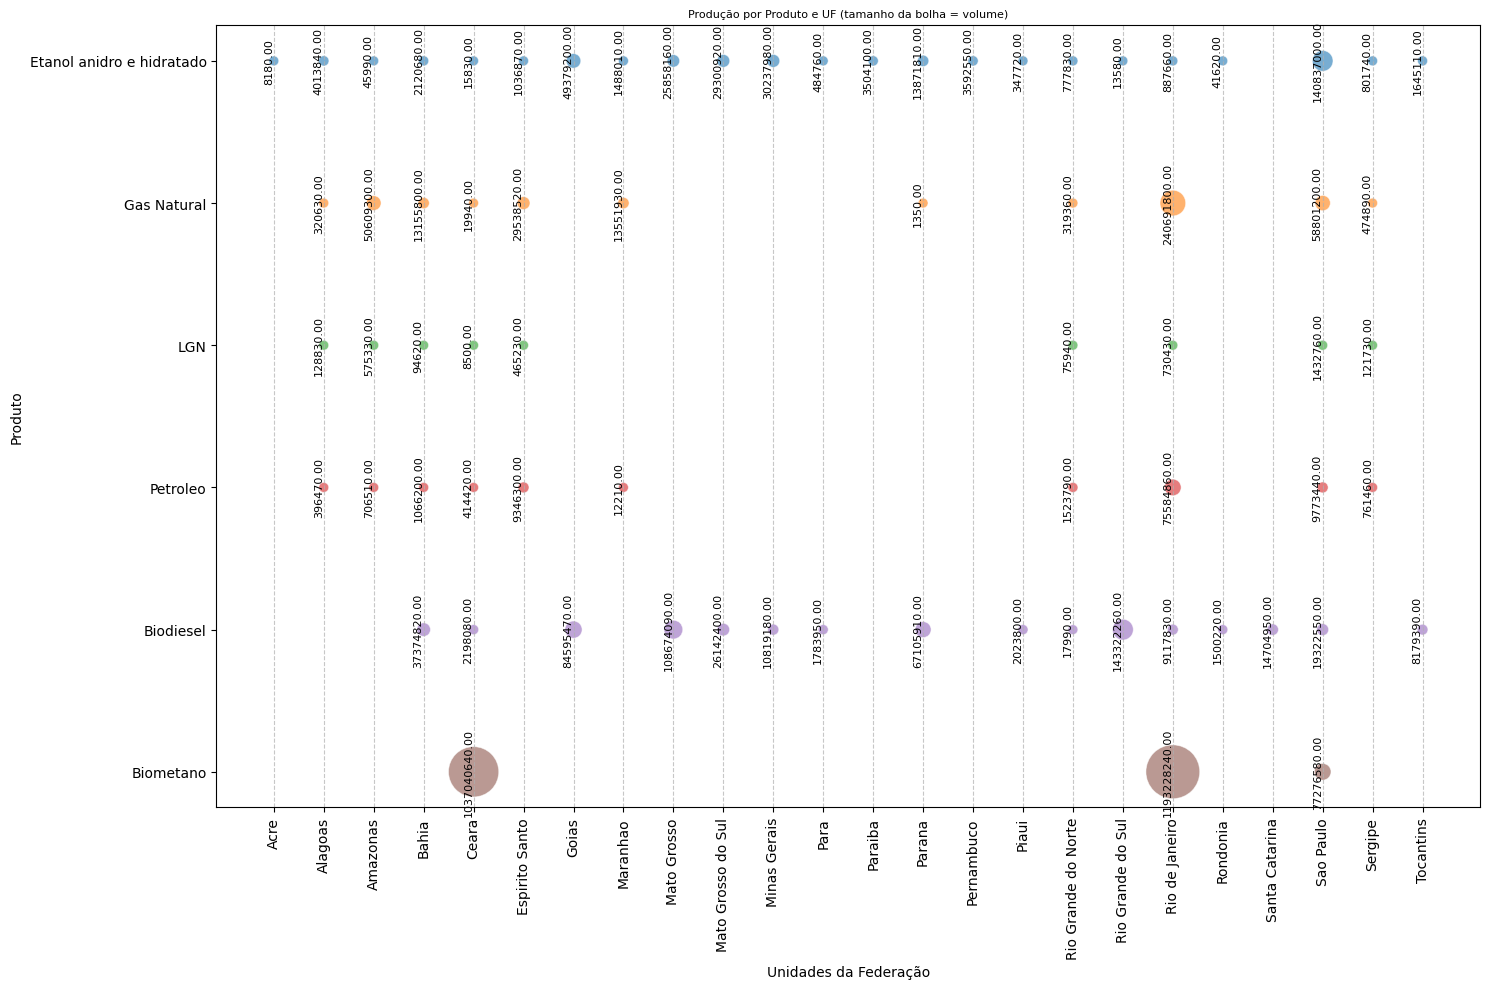

In [74]:
# Agrupar por UF e Produto, somando a produção
df_bolhas = df.groupby(['Unidades da Federacao', 'Produto'], as_index=False)['Producao'].sum()

# Tamanho da bolha proporcional ao volume (ajustado para visualização)
df_bolhas['Tamanho'] = df_bolhas['Producao'] / df_bolhas['Producao'].max() * 1000

# Criar gráfico de bolhas com seaborn
plt.figure(figsize=(15, 10))
bubble = sns.scatterplot(
    data=df_bolhas,
    x='Unidades da Federacao',
    y='Produto',
    size='Tamanho',
    hue='Produto',
    alpha=0.6,
    palette='tab10',
    sizes=(50, 1500),
    legend=False
)

# Adicionar rótulo de valor em notação científica
for i, row in df_bolhas.iterrows():
    plt.text(
        row['Unidades da Federacao'],
        row['Produto'],
        f"{row['Producao']:.2f}",
        rotation = 'vertical',
        fontsize=8,
        ha='right',
        va='center',
        color='black'
    )

# Títulos e ajustes
plt.title('Produção por Produto e UF (tamanho da bolha = volume)', fontsize=8)
plt.xlabel('Unidades da Federação')
plt.ylabel('Produto')
plt.xticks(rotation=90)

# Adicionar grid no eixo X
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## 3. Análise

Com base no gráficos plotados, podemos perceber, assim como análise anterior, a predominância dos estados do Rio de Janeiro e São Paulo nas produções analisadas, porém enquanto o **Rio de Janeiro** se destaca em relação à **produção de Biometano e Petróleo**, o estado **São Paulo** detém um **volume de produção** significativo para **todos os produtos** analisados.



---



## Estatísticas Descritivas

Através desta análise será analisado o comportamento do volume de produção no decorrer da série, agrupando todos os estados.

In [77]:
# Agrupar por Produto e aplicar 'describe' na coluna 'Producao'
analise_estatistica = df.groupby('Produto')['Producao'].describe()

# Exibir o resultado
analise_estatistica


,count,mean,std,min,25%,50%,75%,max
Produto,,,,,,,,
Biodiesel,160.0,3.355518e+06,4.505098e+06,0.0,170045.0,1329905.0,4425172.5,18642910.0
Biometano,30.0,7.691818e+07,1.324265e+08,0.0,0.0,0.0,101679730.0,426100880.0
Etanol anidro e hidratado,230.0,1.349179e+06,3.045196e+06,0.0,14105.0,145365.0,1178225.0,16668250.0
Gas Natural,110.0,3.704407e+06,7.322369e+06,0.0,18377.5,702305.0,4743250.0,39554000.0
LGN,90.0,4.037078e+04,5.270207e+04,0.0,5050.0,13675.0,57125.0,201540.0
Petroleo,100.0,9.958566e+05,2.286542e+06,140.0,35900.0,98910.0,801520.0,10631800.0


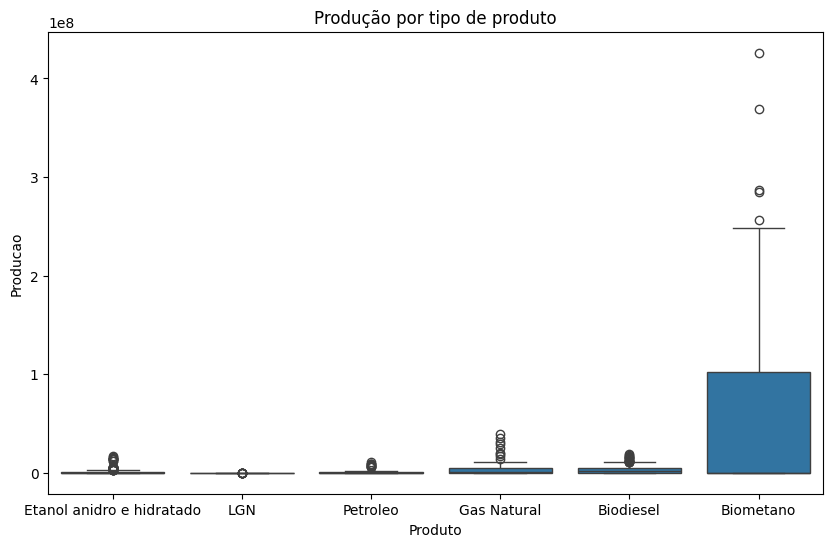

In [79]:
# Gráfico de boxplot da Produção por tipo de produto analisado
plt.figure(figsize=(10, 6))
sns.boxplot(x='Produto', y='Producao', data=df)
plt.title('Produção por tipo de produto')
plt.xlabel('Produto')
plt.ylabel('Producao')
plt.show()

## 4. Análise
Nesta análise há grande destaque para o Biometano, o qual apresenta uma média alta, alto desvio padrão e poucos registros. Ou seja, Há produção significativa concentrada em poucos estados, apontando para a possibilidade de crescimento no investimento desse produto.



---



#5. Conclusão

Este trabalho teve como objetivo analisar a produção nacional de derivados energéticos entre 2014 e 2023, com base em dados públicos da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP). A análise foi realizada por meio de etapas de pré-processamento, normalização dos dados e exploração estatística e visual.

Ao longo do processo, buscamos responder às seguintes três hipóteses:

1. **As Unidades da Federação que concentram a maior produção em termos de volume, também possuem a maior diversidade de produtos?**
Segundo a análise realizada, essa correlação **não é necessariamente verdadeira**. Estados como o Rio de Janeiro e São Paulo concentram volumes elevados de produção, porém o volume produzido no Rio de Janeiro é bastante desigual, a depender do produto analisado.

Estados como Bahia e Goiás apresentaram diversidade significativa de produtos, mesmo que com volumes absolutos menores, o que indica especializações e estratégias de produção distintas entre os estados.


2. **Há produtos que têm sido substituídos ao longo do tempo por outros em ascensão?**
**Sim**. As séries temporais apontaram que alguns produtos apresentam queda progressiva na produção, enquanto outros mostram crescimento consistente, sugerindo **substituição tecnológica ou mudança de política energética**. O Etanol apresenta sinais de expansão em certos estados, enquanto o óleo combustível mostrou retração. Essa substituição pode estar relacionada a fatores ambientais, avanços tecnológicos ou incentivos à produção de biocombustíveis.


3. **Há tendência de crescimento do volume produzido em todos os produtos analisados?**
**Não**. A tendência de crescimento não foi uniforme entre os produtos. Enquanto alguns, como o Gás Natural e os biocombustíveis, apresentaram crescimento moderado ou oscilante ao longo do tempo, outros produtos tiveram quedas acentuadas ou estagnação.



---


Por fim, entende-se que esses achados podem contribuir para estratégias de planejamento energético, identificação de oportunidades de investimento e elaboração de políticas públicas mais equilibradas entre regiões e produtos.